In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [37]:
sales = pd.read_csv("Company_Data(1).csv")
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [39]:
sales.shape

(400, 11)

In [41]:
sales.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [43]:
sales.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
sales['ShelveLoc']=le.fit_transform(sales['ShelveLoc'])
sales['Urban']=le.fit_transform(sales['Urban'])
sales['US']=le.fit_transform(sales['US'])

In [49]:
sales.insert(11,'sales_category','')

In [51]:
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,


In [53]:
for i in range(0,len(sales['Sales']),1):
    if sales['Sales'][i]>=11.0:
        sales["sales_category"][i]='high'
    elif sales['Sales'][i]<=6.0:
        sales['sales_category'][i]='Low'
    else:
        sales['sales_category'][i]='Medium'

In [55]:
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


In [57]:
x=sales.iloc[:,1:11]
y=sales['sales_category']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier()

In [63]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_pred = rf_model.predict(x_test)

In [67]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Low       0.84      0.53      0.65        30
      Medium       0.52      0.88      0.65        34
        high       0.67      0.12      0.21        16

    accuracy                           0.60        80
   macro avg       0.68      0.51      0.51        80
weighted avg       0.67      0.60      0.56        80



In [71]:
print(confusion_matrix(y_test,y_pred))

[[16 14  0]
 [ 3 30  1]
 [ 0 14  2]]


In [73]:
print(accuracy_score(y_test,y_pred))

0.6


In [75]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators':[20,30,20,100,150]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
0.721875


In [76]:
rf_model_cv=RandomForestClassifier(max_depth=8,min_samples_leaf=1,min_samples_split= 8,criterion='entropy',n_estimators=100)
rf_model_cv.fit(x_train,y_train)
y_pred_cv=rf_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred_cv))

0.6125


## Feature importance plot

In [77]:
feature_rf = x_train.columns
len(feature_rf)

10

In [78]:
imp_feature_rf = rf_model.feature_importances_
len(imp_feature_rf)

10

In [79]:
rf_data = pd.DataFrame({'feature':feature_rf,'imp_feature':imp_feature_rf})
rf_data = rf_data.sort_values('imp_feature')

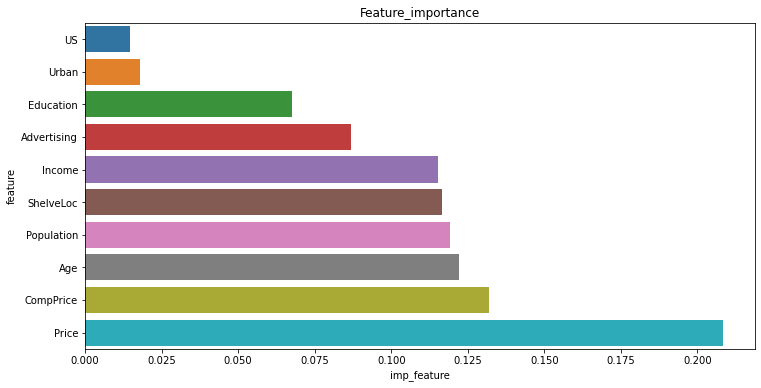

In [80]:
plt.figure(figsize=(12,6))
plt.title('Feature_importance')
sns.barplot(x='imp_feature',y='feature',data=rf_data)
plt.show()

## Feature selection

In [81]:
from sklearn.feature_selection import SelectFromModel

In [82]:
slctr = SelectFromModel(estimator=RandomForestClassifier())
slctr.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [83]:
slctr.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False])

In [84]:
len(x_train.columns)

10

In [85]:
feature = x_train.columns[slctr.get_support()]

In [86]:
len(feature)

6

In [87]:
x_train_rf = slctr.transform(x_train)
x_test_rf = slctr.transform(x_test)
rf_model_imp=RandomForestClassifier().fit(x_train_rf,y_train)
y_pred_imp=rf_model_imp.predict(x_test_rf)

In [88]:
print('accuracy_score:',accuracy_score(y_test,y_pred_imp))
print('----------------------------------')
print('classification_report:',classification_report(y_test,y_pred_imp))
print('----------------------------------')
print('confusion_matrix:',confusion_matrix(y_test,y_pred_imp))

accuracy_score: 0.5875
----------------------------------
classification_report:               precision    recall  f1-score   support

         Low       0.83      0.50      0.62        30
      Medium       0.51      0.88      0.65        34
        high       0.67      0.12      0.21        16

    accuracy                           0.59        80
   macro avg       0.67      0.50      0.49        80
weighted avg       0.66      0.59      0.55        80

----------------------------------
confusion_matrix: [[15 15  0]
 [ 3 30  1]
 [ 0 14  2]]


In [89]:
imp_feature = rf_model_imp.feature_importances_
imp_feature

array([0.16110915, 0.14424389, 0.15138332, 0.2505008 , 0.13046409,
       0.16229875])

In [90]:
data_imp=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_imp=data_imp.sort_values('imp_feature')

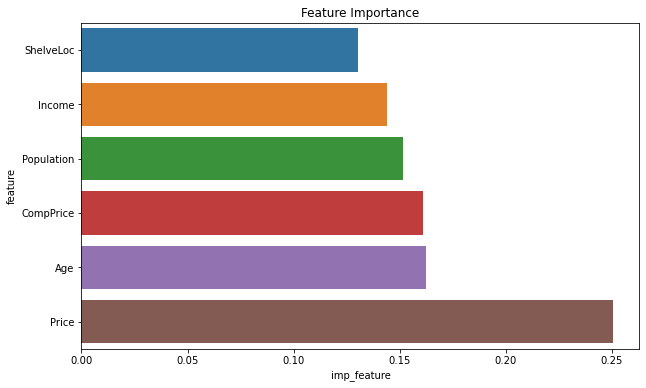

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_imp)
plt.show()

## Recursive feature elimination

In [92]:
from sklearn.feature_selection import RFE

In [93]:
selector_rfe=RFE(RandomForestClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier())

In [94]:
selector_rfe.get_support()

array([ True,  True, False,  True,  True, False,  True, False, False,
       False])

In [95]:
feature_rfe=x_train.columns[selector_rfe.get_support()]
feature_rfe

Index(['CompPrice', 'Income', 'Population', 'Price', 'Age'], dtype='object')

In [96]:
len(x_train.columns[selector_rfe.get_support()])

5

In [97]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [98]:
rf_model_rfe=RandomForestClassifier().fit(x_train_rfe,y_train)
y_pred_rfe=rf_model_rfe.predict(x_test_rfe)

In [99]:
print(confusion_matrix(y_test,y_pred_rfe))

[[10 20  0]
 [ 7 27  0]
 [ 0 15  1]]


In [100]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

         Low       0.59      0.33      0.43        30
      Medium       0.44      0.79      0.56        34
        high       1.00      0.06      0.12        16

    accuracy                           0.48        80
   macro avg       0.67      0.40      0.37        80
weighted avg       0.61      0.47      0.42        80



In [101]:
print(accuracy_score(y_test,y_pred_rfe))

0.475


In [102]:
imp_feature_rfe=rf_model_rfe.feature_importances_

In [103]:
data_rfe=pd.DataFrame({'feature':feature_rfe,'imp_feature':imp_feature_rfe})
data_rfe=data_rfe.sort_values('imp_feature')

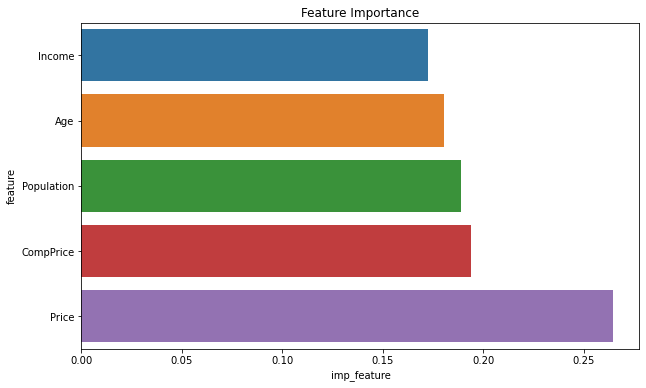

In [104]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rfe)
plt.show()